### Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#x stores the training dataset
x=pd.read_csv("datasets\datatraining.txt")

In [3]:
x.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
#testing dataset
X=pd.read_csv("datasets\datatest.txt")

In [5]:
X.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


### All the datasets have 7 columns -

Date: Date and time <br>
Temperature: Temperature value is in degrees Celsius. <br>
humidity: Relative humidity as a percentage. <br>
Light: Measured in lux.<br>
CO2: Carbon dioxide measured in parts per million. <br>
Humidity Ratio: The humidity ratio, which is determined by the temperature and relative humidity, represents the amount of water vapor in kilograms per kilogram of air. <br>
Occupancy: 1 for occupied or 0 for not occupied. <br>

In [6]:
x.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [7]:
x.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

**No Null value detected in the dataset. No imputation needed.**

In [8]:
x['date'] = pd.to_datetime(x['date'])

In [9]:
x.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

In [10]:
x.duplicated().sum()

0

In [11]:
x.drop_duplicates(inplace=True)

In [12]:
#value counts for the target variable i.e. occupancy
x['Occupancy'].value_counts()

Occupancy
0    6414
1    1729
Name: count, dtype: int64

# Exploratory data analysis
In the exploratory data analysis, we will be looking at the distribution of the data, along with the time series of the data. We will also be looking at the correlation between the variables.

Visualizing the temperture fluctuations over time

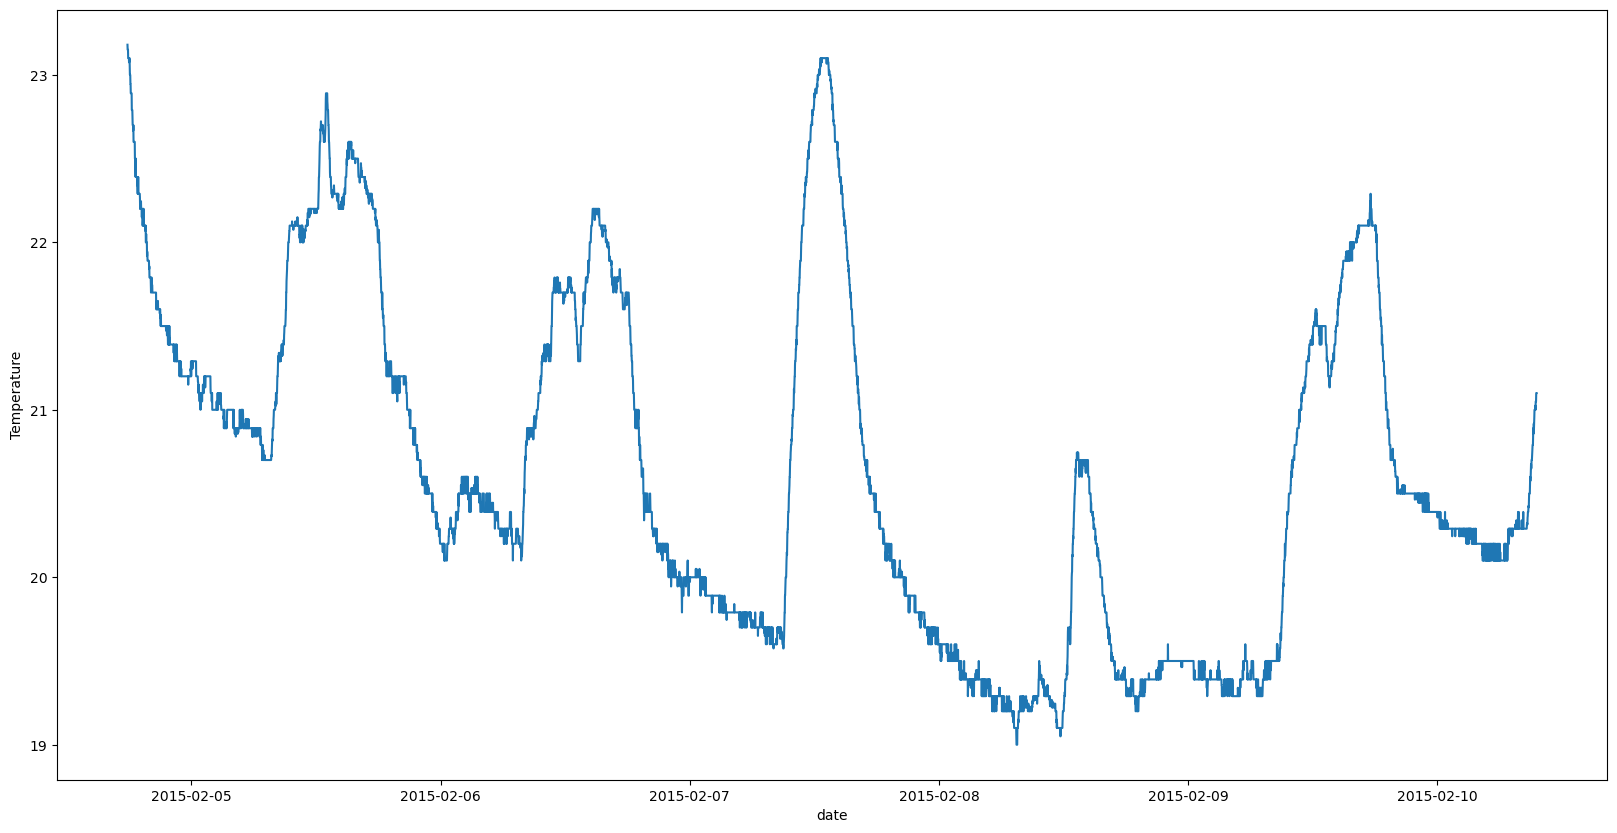

In [13]:
#lineplot for themperature changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='Temperature',data=x)
plt.show()

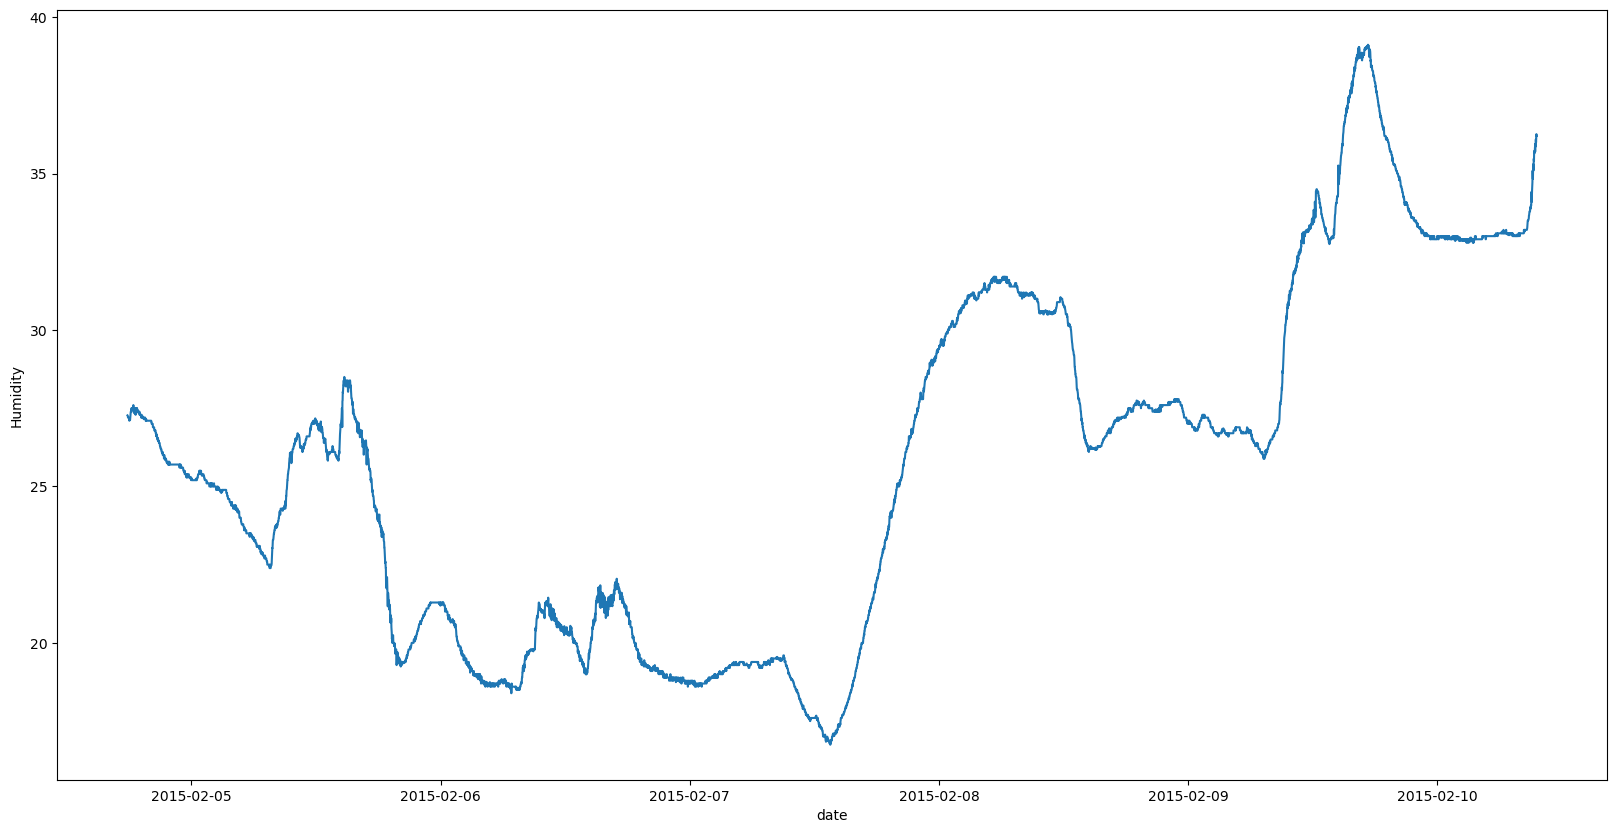

In [14]:
#lineplot for humidity changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='Humidity',data=x)
plt.show()

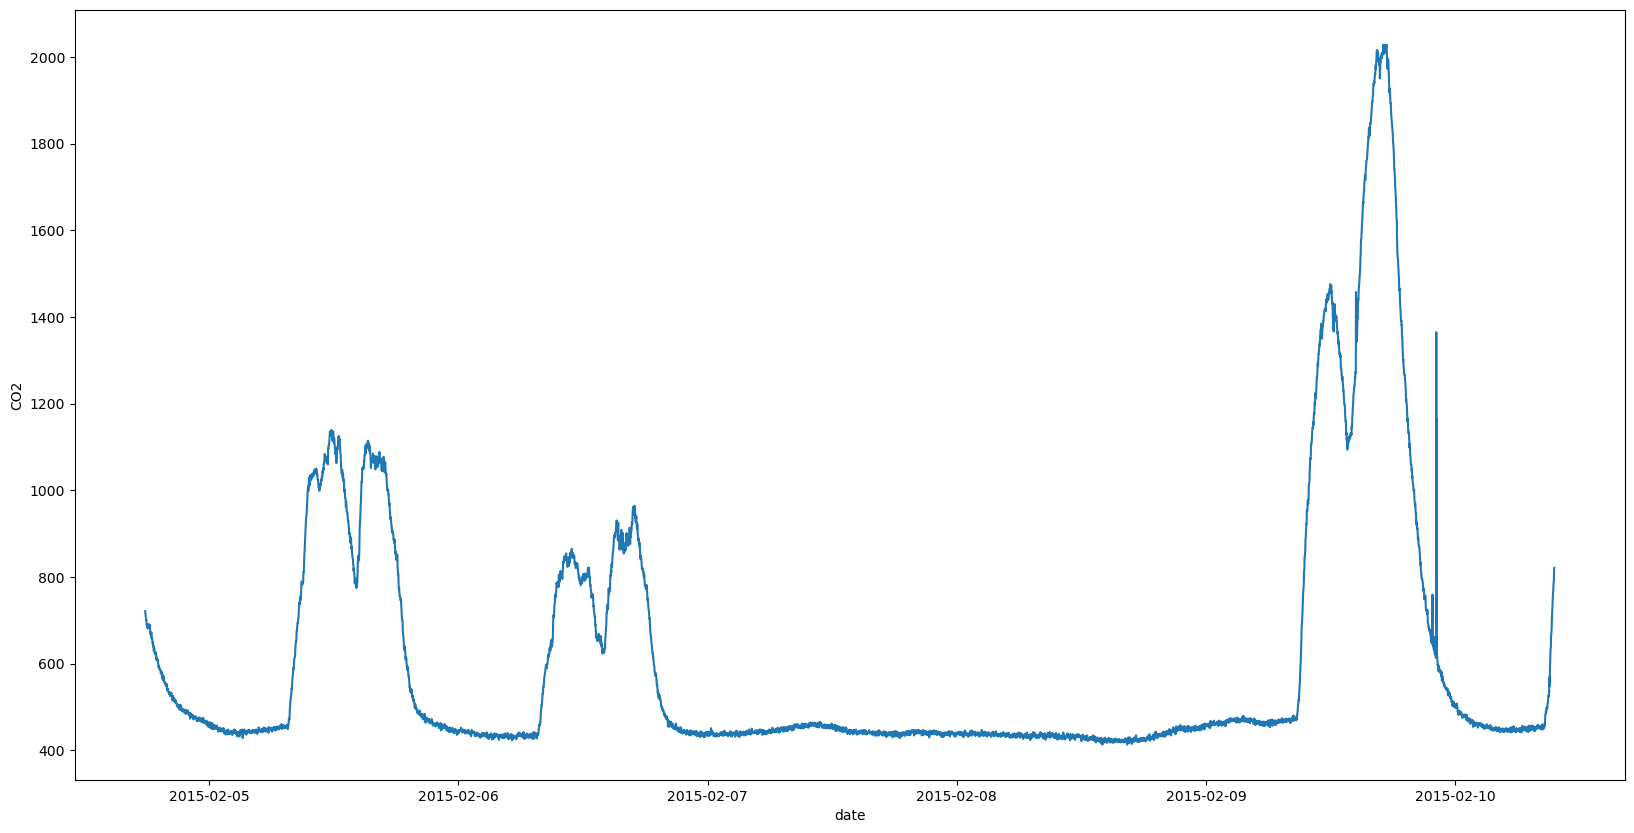

In [15]:
#lineplot for co2 changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='CO2',data=x)
plt.show()

The co2 graph also shows the spikes in the co2 levels which indicates the presence of person in the room, assuming that there is no other source of co2 in the room.In addition to that the spikes also shows correspondence with the temperature graph and light graph. However from 7th of February to 9th of February, the co2 levels where minimum, which indicstes that the room was not occupied during that time. **This observation contradicts with the humidity graph and temperature graph.**

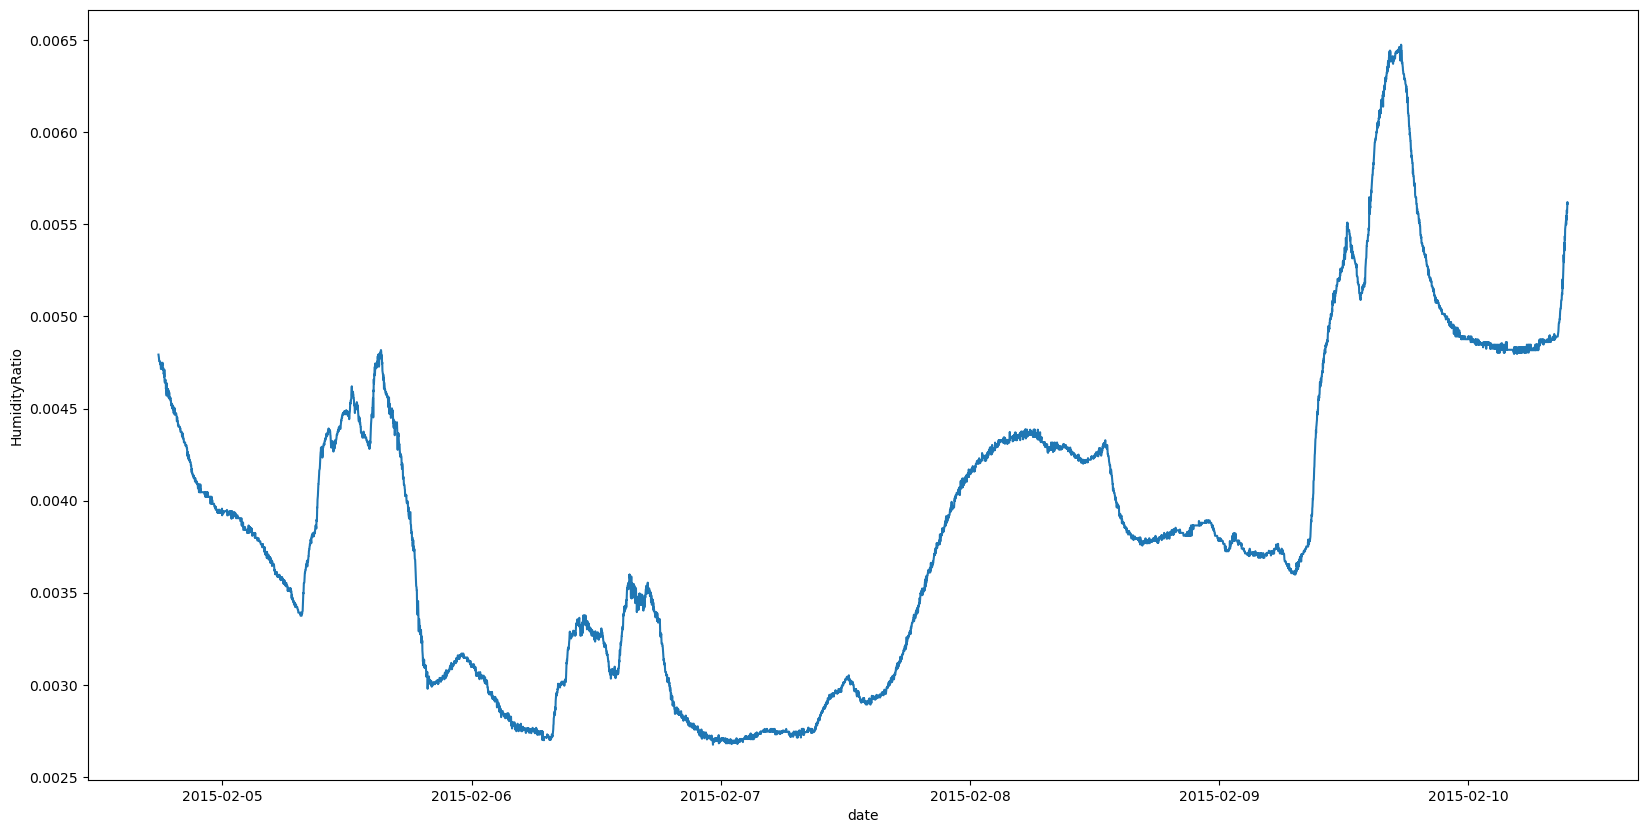

In [16]:
#lineplot for humidity ratio changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='HumidityRatio',data=x)
plt.show()

The humidity ratio graph is quite similar to the humidity graph. The spikes in the graph indicates the presence of people in the room. Moreover the same assumption is made about the humidity ratio after 9th of February.

# **Correlation Heatmap**

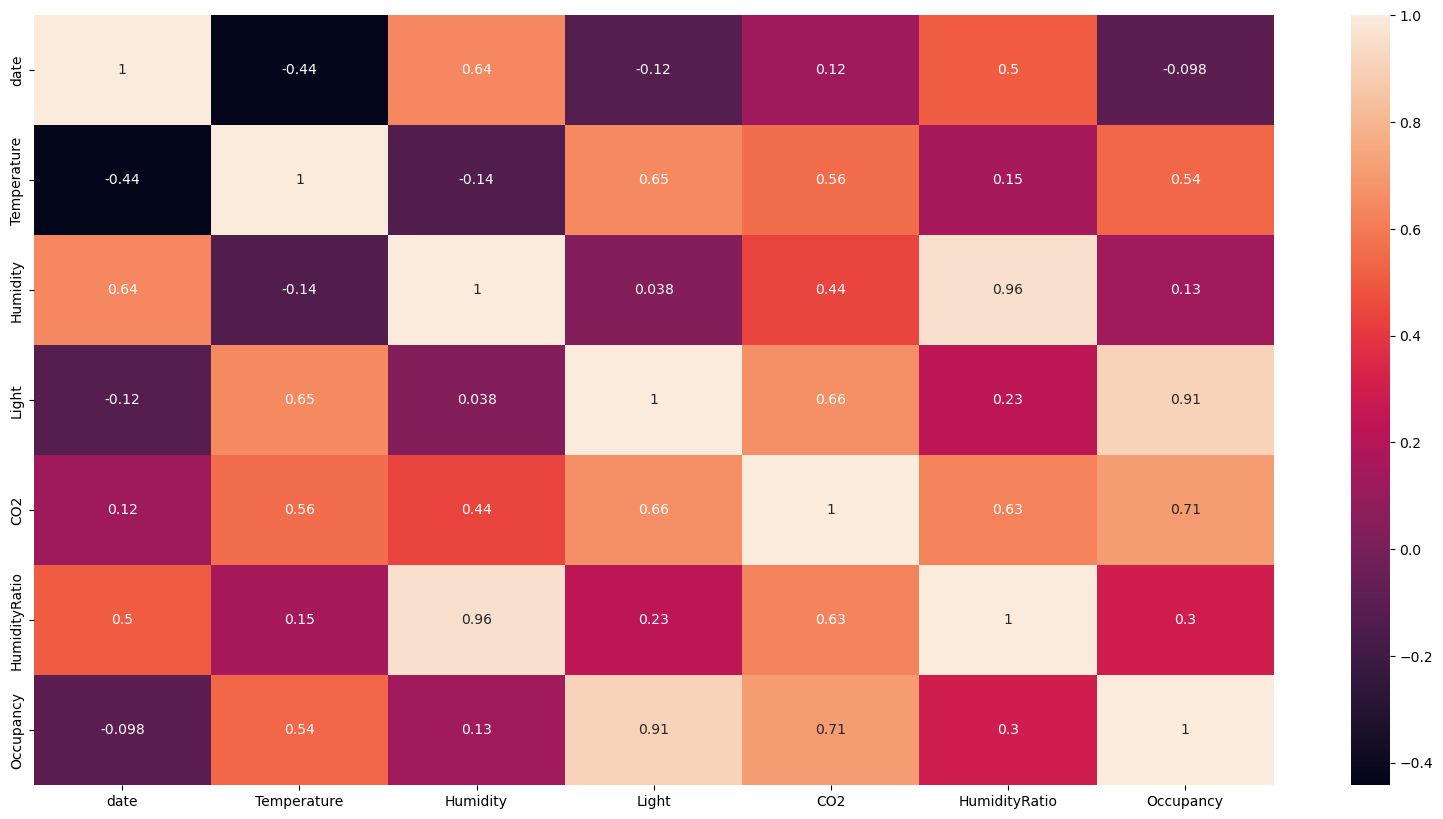

In [20]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(x.corr(),annot=True)
plt.show()

The correlation heatmap and line graphs implies that humidity ratio, humidity and date attributes have insignificant correlation. Hence, these columns can be dropped from the dataframe.
There is a strong coorelation between light and occupancy as well as between humidity and humidity ratio. The co2 levels and temperature also shows a strong correlation with the occupancy

# Data Preprocessing

In [17]:
x=x.drop(['date','Humidity','HumidityRatio'],axis=1)

In [18]:
#new dataframe
x.head()

,Temperature,Light,CO2,Occupancy
1,23.18,426.0,721.25,1
2,23.15,429.5,714.00,1
3,23.15,426.0,713.50,1
4,23.15,426.0,708.25,1
5,23.10,426.0,704.50,1


In [19]:
x.describe()

,Temperature,Light,CO2,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,119.519375,606.546243,0.212330
std,1.016916,194.755805,314.320877,0.408982
min,19.000000,0.000000,412.750000,0.000000
25%,19.700000,0.000000,439.000000,0.000000
50%,20.390000,0.000000,453.500000,0.000000
75%,21.390000,256.375000,638.833333,0.000000
max,23.180000,1546.333333,2028.500000,1.000000


# Applying Machine Learning Algorithms on the Datasets

# Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
x_train=x.drop(['Occupancy'],axis=1)
y_train=x['Occupancy']

In [22]:
x_train.head()

,Temperature,Light,CO2
1,23.18,426.0,721.25
2,23.15,429.5,714.00
3,23.15,426.0,713.50
4,23.15,426.0,708.25
5,23.10,426.0,704.50


In [23]:
y_train.head()

1    1
2    1
3    1
4    1
5    1
Name: Occupancy, dtype: int64

In [24]:
#training the model
model=DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

TRAINING DATA PERFORMANCE


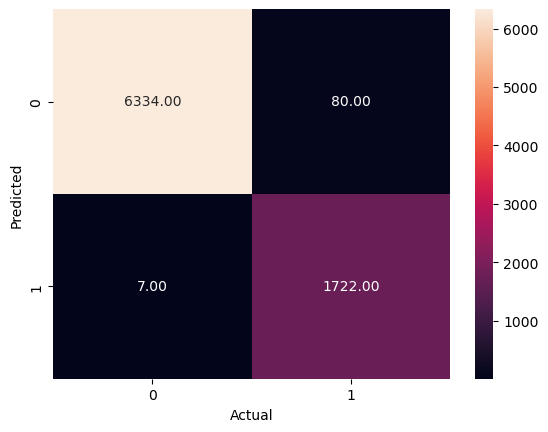

accuracy:  98.93159769126856 %


In [25]:
x_train_predict=model.predict(x_train)
print('TRAINING DATA PERFORMANCE')
sns.heatmap(confusion_matrix(y_train,x_train_predict),annot=True,fmt=".2f")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()
accuracy=accuracy_score(y_train,x_train_predict)
print("accuracy: ",accuracy*100,"%")

In [26]:
#dropping least correlated columns
X=X.drop(['date','Humidity','HumidityRatio'],axis=1)

In [27]:
X.head()

,Temperature,Light,CO2,Occupancy
140,23.7000,585.200000,749.200000,1
141,23.7180,578.400000,760.400000,1
142,23.7300,572.666667,769.666667,1
143,23.7225,493.750000,774.750000,1
144,23.7540,488.600000,779.000000,1


In [28]:
y_test=X['Occupancy']
x_test=X.drop(['Occupancy'],axis=1)


In [29]:
y_test.head()

140    1
141    1
142    1
143    1
144    1
Name: Occupancy, dtype: int64

In [30]:
y_test.head()

140    1
141    1
142    1
143    1
144    1
Name: Occupancy, dtype: int64

TESTING DATA PERFORMANCE


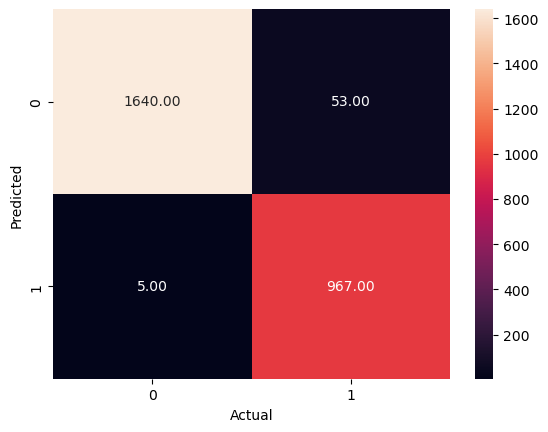

accuracy:  97.82363977485929 %


In [31]:
x_test_predict=model.predict(x_test)
print('TESTING DATA PERFORMANCE')
sns.heatmap(confusion_matrix(y_test,x_test_predict),annot=True,fmt=".2f")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()
accuracy=accuracy_score(y_test,x_test_predict)
print("accuracy: ",accuracy*100,"%")

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,x_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



**Hyperparameter tuning for decision tree classifier**

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}
gridDC = GridSearchCV(model, param_grid, cv=5, refit=True)
gridDC.fit(x_train, y_train)

C:\Users\mnoch\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mnoch\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mnoch\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\mnoch\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mnoch\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [34]:
gridDC.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10}

TESTING DATA PERFORMANCE ON DECISION TREE CLASSIFIER with hyperparameter tuning


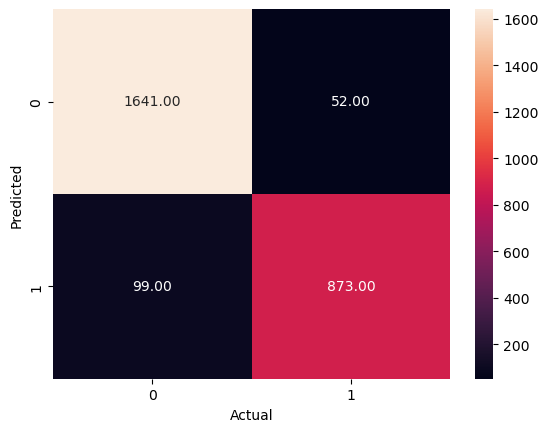

accuracy:  94.33395872420263 %


In [35]:
gridDC_predictions = gridDC.predict(x_test)
print('TESTING DATA PERFORMANCE ON DECISION TREE CLASSIFIER with hyperparameter tuning')
sns.heatmap(confusion_matrix(y_test,gridDC_predictions), annot=True, fmt=".2f")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()
accuracy=accuracy_score(y_test,gridDC_predictions)
print("accuracy: ",accuracy*100,"%")

In [36]:
print(classification_report(y_test,gridDC_predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1693
           1       0.94      0.90      0.92       972

    accuracy                           0.94      2665
   macro avg       0.94      0.93      0.94      2665
weighted avg       0.94      0.94      0.94      2665



# Support Vector Classifier

In [39]:
from sklearn.svm import SVC

In [40]:
#wihout hyperparameter tuning
SVM_model = SVC()
SVM_model.fit(x_train,y_train)

SVC()

TRAINING DATA PERFORMANCE ON SVM (wihout hyperparameter tuning)


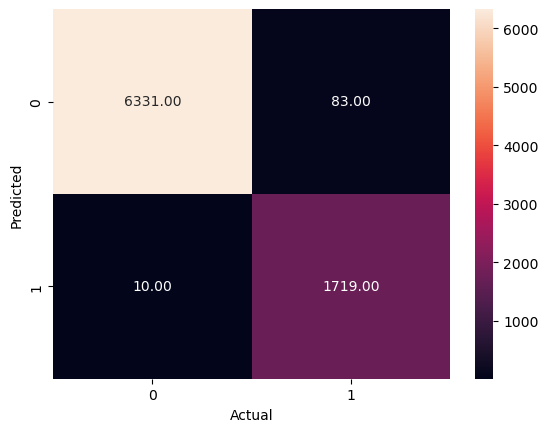

accuracy:  98.85791477342502 %


In [41]:
svm_x_train_predict = SVM_model.predict(x_train)
print('TRAINING DATA PERFORMANCE ON SVM (wihout hyperparameter tuning)')
sns.heatmap(confusion_matrix(y_train,svm_x_train_predict),annot=True,fmt=".2f")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()
accuracy=accuracy_score(y_train,svm_x_train_predict)
print("accuracy: ",accuracy*100,"%")

TESTING DATA PERFORMANCE ON SVM (without hyperparameter tuning)


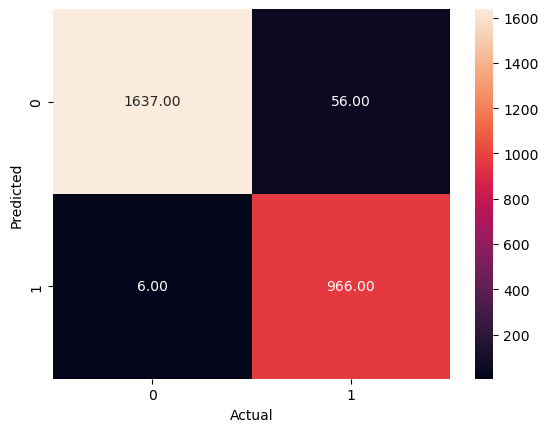

accuracy:  97.67354596622889 %


In [43]:
svm_x_test_predict = SVM_model.predict(x_test)
print('TESTING DATA PERFORMANCE ON SVM (without hyperparameter tuning)')
sns.heatmap(confusion_matrix(y_test,svm_x_test_predict),annot=True,fmt=".2f")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()
accuracy=accuracy_score(y_test,svm_x_test_predict)
print("accuracy: ",accuracy*100,"%")

In [44]:
print(classification_report(y_test,svm_x_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



### Hyperparameter Tuning

In [99]:
param_grid = [{'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']},
              {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4]},
    {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [1, 0.1, 0.01, 0.001]}
]
gridSVC = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [100]:
gridSVC.fit(x_train,y_train)

Fitting 5 folds for each of 65 candidates, totalling 325 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.788 total time=   1.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.788 total time=   1.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.788 total time=   1.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   1.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.788 total time=   1.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.789 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.788 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.702 total time=   1.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.804 total time=   1.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.791 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.942 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.829 total time=   2.7s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.680 total time=   1.4s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.663 total time=   1.4s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.867 total time=   1.6s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.946 total time=   1.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.965 total time=   1.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.696 total time=   1.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.738 total time=   1.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.883 total time=   1.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.945 total time=   0.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.957 total time=   0.9s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.729 total time=   0.7s
[CV 4/5] END ....C=1000, gam

[CV 4/5] END ......C=100, degree=3, kernel=poly;, score=0.988 total time=   0.8s
[CV 5/5] END ......C=100, degree=3, kernel=poly;, score=0.810 total time=   1.2s
[CV 1/5] END ......C=100, degree=4, kernel=poly;, score=0.959 total time=   0.2s
[CV 2/5] END ......C=100, degree=4, kernel=poly;, score=0.975 total time=   1.0s
[CV 3/5] END ......C=100, degree=4, kernel=poly;, score=0.921 total time=   1.1s
[CV 4/5] END ......C=100, degree=4, kernel=poly;, score=0.991 total time=   1.3s
[CV 5/5] END ......C=100, degree=4, kernel=poly;, score=0.996 total time=   2.7s
[CV 1/5] END .....C=1000, degree=2, kernel=poly;, score=0.959 total time=   0.1s
[CV 2/5] END .....C=1000, degree=2, kernel=poly;, score=0.980 total time=   0.9s
[CV 3/5] END .....C=1000, degree=2, kernel=poly;, score=0.907 total time=   1.2s
[CV 4/5] END .....C=1000, degree=2, kernel=poly;, score=0.999 total time=   0.7s
[CV 5/5] END .....C=1000, degree=2, kernel=poly;, score=0.881 total time=   1.1s
[CV 1/5] END .....C=1000, de

[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.788 total time=   0.9s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.788 total time=   0.6s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.788 total time=   0.6s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.787 total time=   0.6s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.788 total time=   0.6s
[CV 1/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.788 total time=   0.5s
[CV 2/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.788 total time=   0.6s
[CV 3/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.788 total time=   0.7s
[CV 4/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.787 total time=   0.5s
[CV 5/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.788 total time=   0.6s
[CV 1/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.788 total time=   0.6s
[CV 2/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.788 total time=   0.5s
[CV 3/5] END C=1000, gamma=0

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['sigmoid']}],
             verbose=3)

In [101]:
gridSVC.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [102]:
gridSVC.best_estimator_

SVC(C=0.1, kernel='linear')

TESTING DATA PERFORMANCE ON SVM with hyperparameter tuning


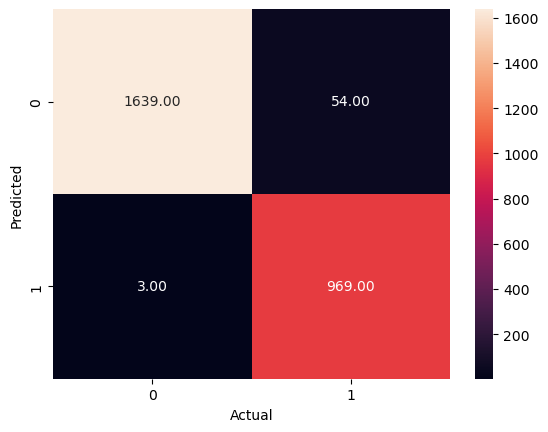

accuracy:  97.86116322701689 %


In [103]:
grid_predictions = gridSVC.predict(x_test)
print('TESTING DATA PERFORMANCE ON SVM with hyperparameter tuning')
sns.heatmap(confusion_matrix(y_test,grid_predictions),annot=True,fmt=".2f")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()
accuracy=accuracy_score(y_test,grid_predictions)
print("accuracy: ",accuracy*100,"%")

In [104]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



**GridSearchCV using Hyperparameter tuning lead to increase of 0.19% accuracy score of model on testing data.**

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

TRAINING DATA PERFORMANCE ON LOGISTIC REGRESSION


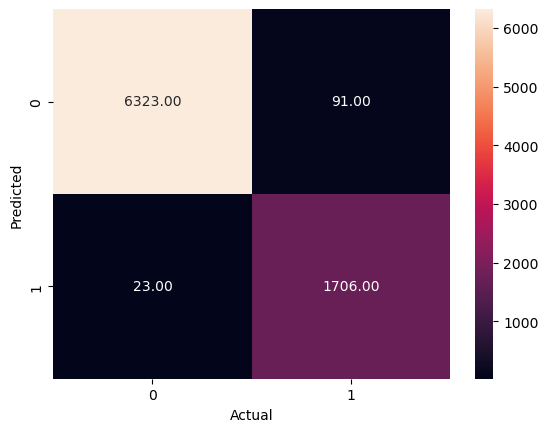

accuracy:  98.60002456097261 %


In [55]:
log_x_train_predict = logmodel.predict(x_train)
print('TRAINING DATA PERFORMANCE ON LOGISTIC REGRESSION')
sns.heatmap(confusion_matrix(y_train,log_x_train_predict),annot=True,fmt=".2f")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()
accuracy=accuracy_score(y_train,log_x_train_predict)
print("accuracy: ",accuracy*100,"%")

TESTING DATA PERFORMANCE ON LOGISTIC REGRESSION


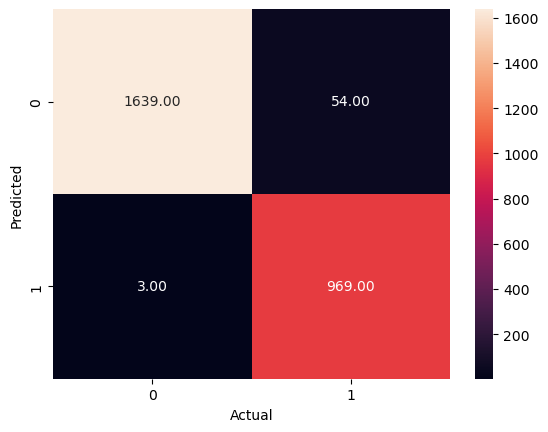

accuracy:  97.86116322701689 %


In [59]:
log_x_test_predict = logmodel.predict(x_test)
print('TESTING DATA PERFORMANCE ON LOGISTIC REGRESSION')
sns.heatmap(confusion_matrix(y_test,log_x_test_predict),annot=True,fmt=".2f")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()
accuracy=accuracy_score(y_test,log_x_test_predict)
print("accuracy: ",accuracy*100,"%")

In [60]:
print(classification_report(y_test,log_x_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



### conclusion <br>
    Logistic Regression Classifier has the best accuracy score i.e. 97.86% for training and testing data.
    The results are similar to SVC with hyperparameter tuning, however, Logistic Regression is the most optimised one.

### THE END